In [337]:
import numpy as np
import pandas as pd
import random
import pickle

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### 0. загрузка данных и просмотр

In [209]:
train_data = pd.read_csv('./project_data_from_kaggle/train.csv', sep = ',')
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [210]:
train_data.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
9999,7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


In [211]:
train_data.shape

(10000, 20)

In [212]:
train_data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [213]:
train_data.index

RangeIndex(start=0, stop=10000, step=1)

In [214]:
train_data.HouseYear

0       2014
1       1966
2       1988
3       1977
4       1972
        ... 
9995    1981
9996    1977
9997    1958
9998    1969
9999    1975
Name: HouseYear, Length: 10000, dtype: int64

In [215]:
train_data.agg([np.min, np.mean, np.max])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
amin,0.0000,0.0000,0.0000,1.136859,0.370619,0.0000,1.0000,0.0000,1.910000e+03,0.000000,A,A,0.000,168.0000,0.0000,0.00000,0.0000,0.0000,A,59174.778028
mean,8383.4077,50.4008,1.8905,56.315775,37.199645,6.2733,8.5267,12.6094,3.990166e+03,0.118858,NaN,NaN,24.687,5352.1574,8.0392,1142.90446,1.3195,4.2313,NaN,214138.857399
amax,16798.0000,209.0000,19.0000,641.065193,7480.592129,2014.0000,42.0000,117.0000,2.005201e+07,0.521867,B,B,74.000,19083.0000,141.0000,4849.00000,6.0000,23.0000,B,633233.466570


#### приведение типов

In [216]:
train_data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [217]:
train_data["Id"]=train_data["Id"].astype(str)

In [218]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

### 1. Распределение целевой переменной

In [219]:
train_data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

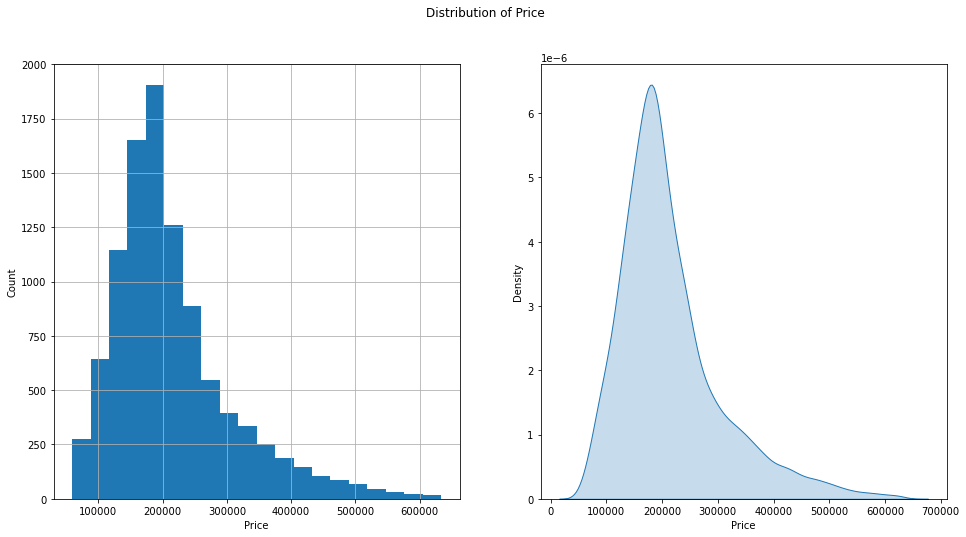

In [220]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train_data['Price'].hist(density=False, bins=20)
plt.ylabel('Сount')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(train_data['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [221]:
target_mean = round(train_data['Price'].mean(), 2)
target_median = train_data['Price'].median()
target_mode = train_data['Price'].mode()[0]

In [222]:
target_mode

59174.77802758122

In [223]:
target_bins = train_data['Price'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

180000.0

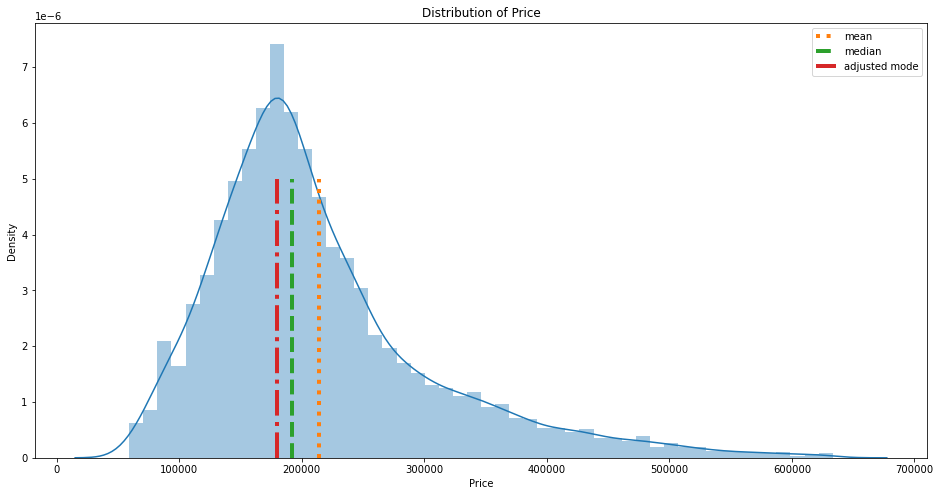

In [224]:
plt.figure(figsize = (16, 8))

sns.distplot(train_data['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

### 2. EDA и очистка данных

In [225]:
train_data_num_features = train_data.select_dtypes(include=['float64', 'int64'])
train_data_num_features.drop('Price', axis=1, inplace=True)

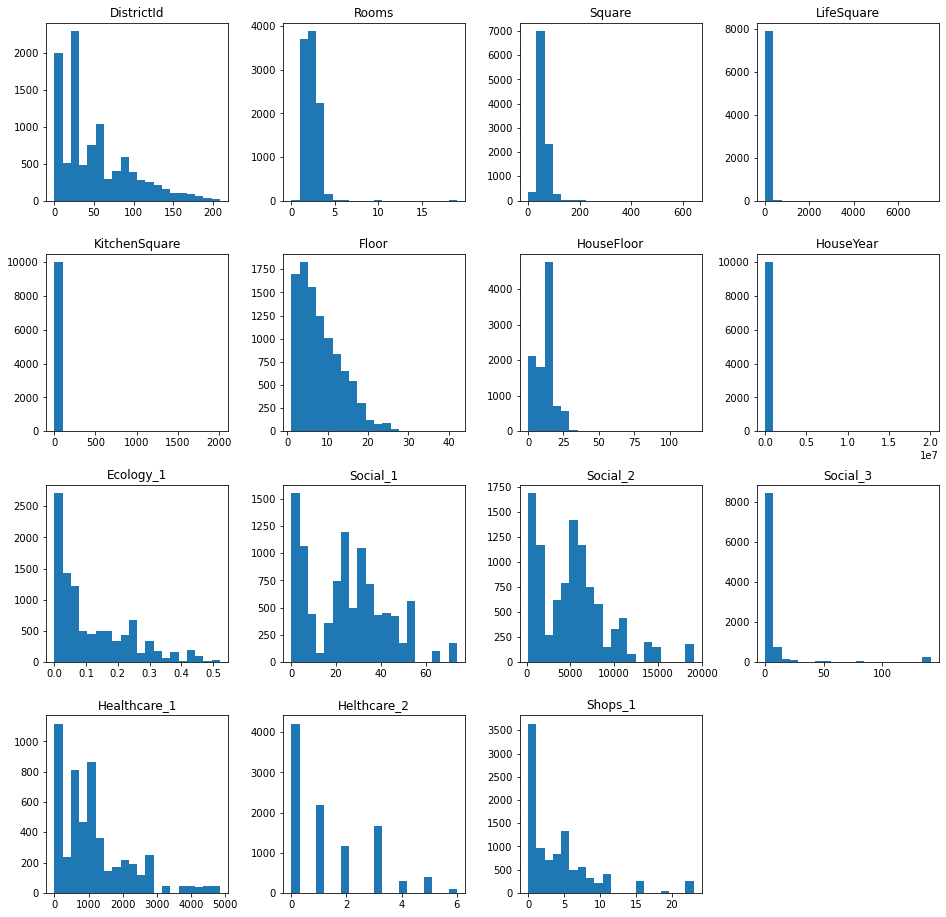

In [226]:
train_data_num_features.hist(figsize=(16,16), bins=20, grid=False);

#### Обзор количественных переменных

In [227]:
train_num_features = train_data.select_dtypes(include=['float64', 'int64'])
train_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.720850
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6,343995.102962


In [228]:
train_data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


#### обзор категориальных переменных

In [229]:
train_obj_features = train_data.select_dtypes(include='object')
train_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,11809,B,B,B
1,3013,B,B,B
2,8215,B,B,B
3,2352,B,B,B
4,13866,B,B,B


In [230]:
train_data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [231]:
train_data['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [232]:
train_data['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

#### обзор пропусков

In [233]:
train_data.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### заполняем медианой пропуски признака LifeSquare

In [234]:
median_ls = train_data['LifeSquare'].median()
median_ls

32.781260192155735

In [235]:
train_data['LifeSquare'].isna().sum()

2113

In [236]:
train_data['LifeSquare'].fillna(median_ls, inplace=True)

In [237]:
train_data['LifeSquare'].isna().sum()

0

#### заполняем медианой пропуски признака healthcare_1

In [238]:
median_hc = train_data['Healthcare_1'].median()
median_hc

900.0

In [239]:
train_data['Healthcare_1'].isna().sum()

4798

In [240]:
train_data['Healthcare_1'].fillna(median_ls, inplace=True)

In [241]:
train_data['Healthcare_1'].isna().sum()

0

In [242]:
train_data.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

#### обработка выбросов

In [243]:
#есть подозрительные значения по количесту комнат - Rooms
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

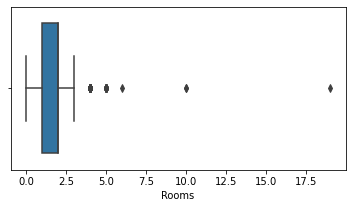

In [244]:
plt.figure(figsize=(6, 3))

sns.boxplot(train_data['Rooms'], whis=1.5)

plt.xlabel('Rooms')
plt.show()

In [245]:
# если количество комнат = 0, заменяем на 1, а где больше 5, заменяем на медиану

train_data.loc[train_data['Rooms'] == 0, 'Rooms'] = 1
train_data.loc[train_data['Rooms'] > 5, 'Rooms'] = train_data['Rooms'].median()

In [246]:
train_data['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

In [247]:
#есть выбросы в общей площади. Если площадь менее 15, или более 300, то заменяем на медиану. 

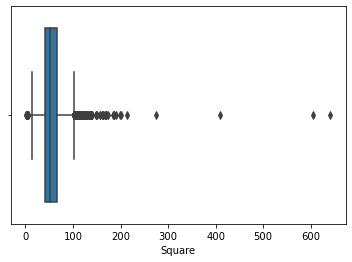

In [248]:
sns.boxplot(train_data['Square'], whis=1.5)

plt.xlabel('Square')
plt.show()

In [249]:
condition = (train_data['Square'] > 300) | (train_data['Square'] < 15)
train_data.loc[condition, 'Square'] = train_data['Square'].median()

In [250]:
#заметны выбросы у KitchenSquare - есть много значений = 0 или менее 5.
train_data['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
30.0         2
43.0         2
41.0         2
112.0        2
25.0         2
51.0         2
37.0         2
58.0         2
32.0         2
21.0         1
73.0         1
75.0         1
36.0         1
27.0         1
63.0         1
1970.0       1
54.0         1
53.0         1
60.0         1
26.0         1
66.0         1
39.0         1
29.0         1
78.0         1
31.0         1
84.0         1
48.0         1
96.0         1
42.0         1
40.0         1
23.0         1
72.0         1
35.0         1
62.0         1
123.0        1
2014.0       1
Name: KitchenSquare, dtype: int64

In [251]:
train_data['KitchenSquare'].quantile(0.99)

16.0

In [252]:
train_data['KitchenSquare'].quantile(.01)

0.0

In [253]:
# если площадь кухни < 5, то заменяем на 5, а если больше 16, то заменяем на медиану

train_data.loc[train_data['KitchenSquare'] < 5, 'KitchenSquare'] = 5
train_data.loc[train_data['KitchenSquare'] > 16, 'KitchenSquare'] = train_data['KitchenSquare'].median()

In [254]:
##есть выбросы в жилой площади площади. Если площадь менее 10, или более 250, то заменяем на медиану. 

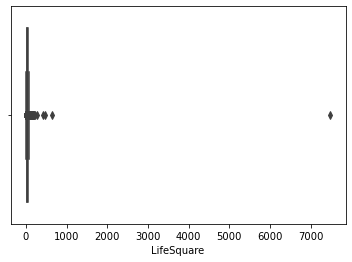

In [255]:
sns.boxplot(train_data['LifeSquare'], whis=1.5)
plt.xlabel('LifeSquare')
plt.show()

In [256]:
condition = (train_data['LifeSquare'] > 250) | (train_data['LifeSquare'] < 10)
train_data.loc[condition, 'LifeSquare'] = train_data['LifeSquare'].median()

In [257]:
## проверяем этажи. Если этаж квартиры выше чем этажность в доме, то этажность в доме меняем на этаж квартиры. 
## Если этажность дома выше 50 этажей, заменяем её на квантиль 0.975. 

In [258]:
train_data['HouseFloor'].quantile(0.975)

25.0

In [259]:
train_data.loc[train_data['HouseFloor'] > 50, 'HouseFloor'] = train_data['HouseFloor'].quantile(0.975)

In [260]:
train_data.loc[train_data['Floor'] > train_data['HouseFloor'], 'HouseFloor'] = \
train_data.loc[train_data['Floor'] > train_data['HouseFloor'], 'Floor'] 

In [261]:
(train_data['Floor'] > train_data['HouseFloor']).sum()

0

In [262]:
## проверяем год постройки. Тут есть 2 записи с выбросами, это 4968 и 20052011. Заменим 20052011 на 2005, а 4968 на 
## медиану среди домов в этом же районе (districtID = 147): 
train_data['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1928           1
1910           1
1916           1
4968           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

In [263]:
train_data.loc[train_data['HouseYear'] == 20052011, 'HouseYear'] = 2005

In [264]:
train_data.loc[train_data['HouseYear'] == 4968, 'HouseYear'] = \
train_data.loc[train_data['DistrictId'] == 147, 'HouseYear'].median()

In [266]:
## Ecology_2, Ecology_3, Shops_2 заменим на бинарные признаки

In [267]:
train_data = pd.concat([train_data, pd.get_dummies(train_data[['Ecology_2', 'Ecology_3', 'Shops_2']])], axis=1)
train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,0,0,B,305018.871089,0,1,0,1,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,B,177734.553407,0,1,0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,B,282078.720850,0,1,0,1,0,1
3,2352,1,1.0,40.409907,32.781260,5.0,10,22.0,1977,0.007122,...,0,1,B,168106.007630,0,1,0,1,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,B,343995.102962,0,1,0,1,0,1


### 3. Анализ зависимости таргета от фичей

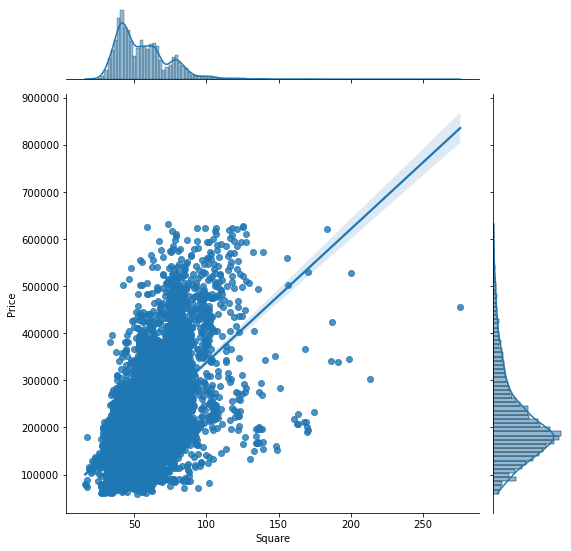

In [269]:
grid = sns.jointplot(train_data['Square'], train_data['Price'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

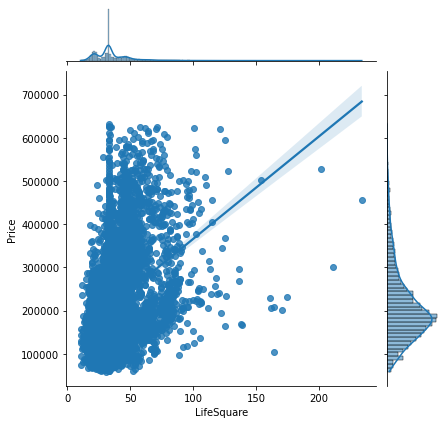

In [270]:
grid = sns.jointplot(train_data['LifeSquare'], train_data['Price'], kind='reg')
plt.show()

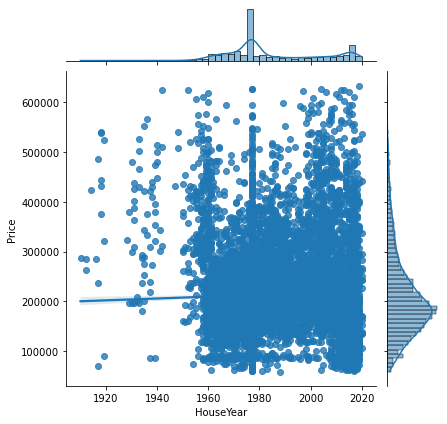

In [271]:
grid = sns.jointplot(train_data['HouseYear'], train_data['Price'], kind='reg')
plt.show()

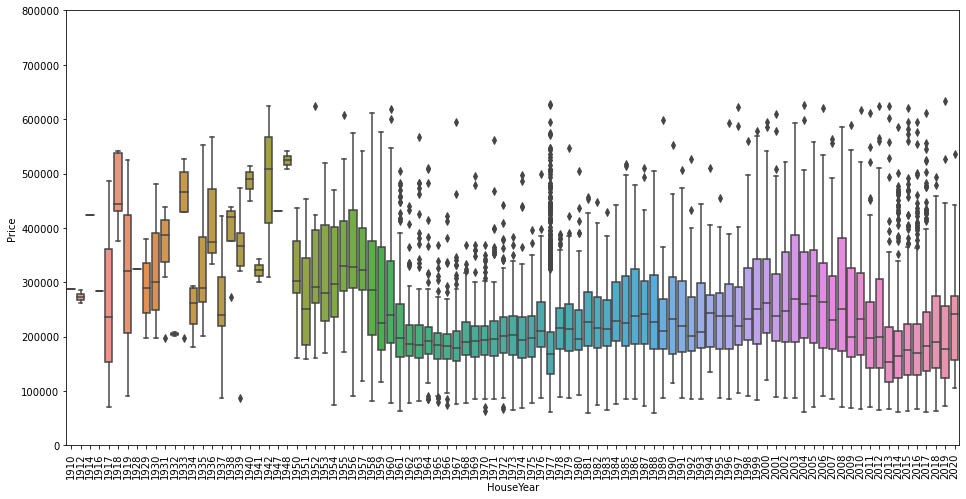

In [272]:
data = pd.concat([train_data['Price'], train_data['HouseYear']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='HouseYear', y="Price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

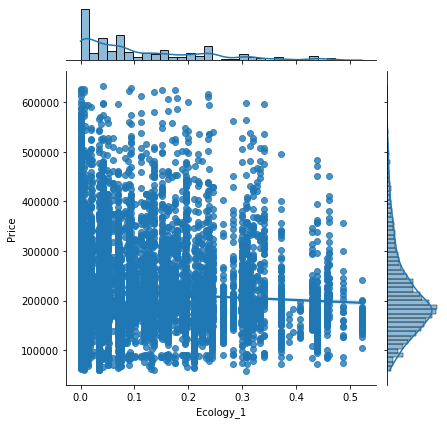

In [273]:
grid = sns.jointplot(train_data['Ecology_1'], train_data['Price'], kind='reg')
plt.show()

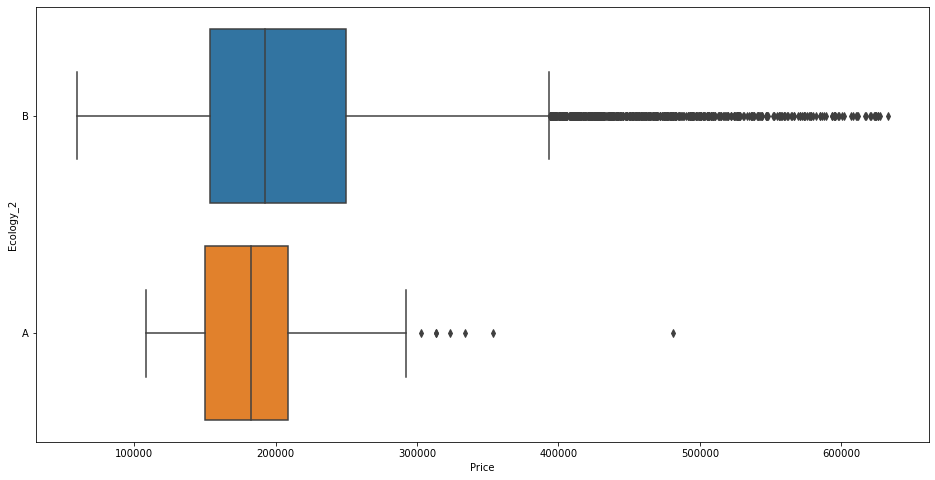

In [274]:
plt.figure(figsize=(16, 8))

sns.boxplot(train_data['Price'], train_data['Ecology_2'], whis=1.5)

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.show()

### 4 Подготовка данных

In [281]:
class DataPipeline:
    """Подготовка исходных данных"""
    
    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        self.house_floor_quantile = None
        self.house_year_147_district = None

    def fit(self, df):
        """Сохранение статистик"""      
        # Расчет медиан
        self.medians = df.median()
        self.house_year_147_district = df.loc[df['DistrictId'] == 147, 'HouseYear'].median()
        self.kitchen_square_quantile = df['KitchenSquare'].quantile(0.99)
        self.house_floor_quantile = df['HouseFloor'].quantile(0.975)
        
    def transform(self, df):
        """Трансформация данных"""
        
        # 1. Пропуски
        df['LifeSquare'] = df['LifeSquare'].fillna(self.medians['LifeSquare'])
        df['Healthcare_1'] = df['Healthcare_1'].fillna(self.medians['Healthcare_1'])
                
        
        # 2. Выбросы (outliers)
        #Rooms
        # если количество комнат = 0, заменяем на 1, а где больше 5, заменяем на медиану
        df.loc[df['Rooms'] == 0, 'Rooms'] = 1
        df.loc[df['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']
        
        #Square
        #Если площадь менее 15, или более 300, то заменяем на медиану. 
        condition = (df['Square'] > 300) | (df['Square'] < 15)
        df.loc[condition, 'Square'] = self.medians['Square']
        
        #KitchenSquare
        ## если площадь кухни < 5, то заменяем на 5, а если больше квантиля 0.99, то заменяем на медиану
        df.loc[df['KitchenSquare'] < 5, 'KitchenSquare'] = 5
        df.loc[df['KitchenSquare'] > self.kitchen_square_quantile, 'KitchenSquare'] = self.medians['KitchenSquare']
        
              
        #LifeSquare
        #Если площадь менее 10, или более 250, то заменяем на медиану. 
        condition = (train_data['LifeSquare'] > 250) | (df['LifeSquare'] < 10)
        df.loc[condition, 'LifeSquare'] = self.medians['LifeSquare']
        
        #Floor, HouseFloor
        #Если этаж квартиры выше чем этажность в доме, то этажность в доме меняем на этаж квартиры. 
        #Если этажность дома выше 50 этажей, заменяем её на квантиль 0.975. 
        df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = self.house_floor_quantile
        df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor'] = \
        df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] 
        
        # проверяем год постройки. Тут есть 2 записи с выбросами, это 4968 и 20052011. Заменим 20052011 на 2005, а 4968 на 
        # медиану среди домов в этом же районе (districtID = 147):
        df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2005
        df.loc[df['HouseYear'] == 4968, 'HouseYear'] = self.house_year_147_district
       
        
        # 3. Обработка категорий
        # Ecology_2, Ecology_3, Shops_2 заменим на бинарные признаки
        df = pd.concat([df, pd.get_dummies(df[['Ecology_2', 'Ecology_3', 'Shops_2']])], axis=1)
        
        return df

In [309]:
TRAIN_DATASET_PATH = './project_data_from_kaggle/train.csv'
TEST_DATASET_PATH = './project_data_from_kaggle/test.csv'
PREPARED_DATASET_PATH = './project_data_from_kaggle/train_prepared.csv'
PREPARED_DATASET_PATH_STANDARD = './project_data_from_kaggle/train_prepared_stand.csv'

#### Оставим признаки, которые необходимы для модели

In [304]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [316]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1','Social_1',
 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B',
 'Shops_2_A', 'Shops_2_B']

target_name = 'Price'

#### разбиение на train/validation

In [311]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [312]:
X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [313]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

pipe = DataPipeline()
pipe.fit(X_train)

X_train = pipe.transform(X_train)
X_valid = pipe.transform(X_valid)
test_df = pipe.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 25), (3300, 25), (5000, 25))

In [317]:
X_train = X_train[feature_names]
X_valid = X_valid[feature_names]
test_df = test_df[feature_names]

In [320]:
X_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
9239,1.0,43.380798,32.679351,5.0,18,25.0,1977,0.075779,6,1437,3,920.0,0,2,0,1,0,1,0,1
6930,3.0,83.596365,32.679351,5.0,3,16.0,1977,0.000078,22,6398,141,1046.0,3,23,0,1,0,1,0,1
8136,2.0,53.610583,31.289235,8.0,14,14.0,1979,0.298205,16,4048,3,920.0,1,3,0,1,0,1,0,1
3424,2.0,51.877576,30.075022,6.0,3,9.0,1974,0.265089,37,5288,0,1937.0,3,2,0,1,0,1,0,1
6518,1.0,53.810968,32.679351,5.0,4,4.0,1977,0.072158,2,629,1,920.0,0,0,0,1,0,1,1,0


In [321]:
test_df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,4378,0,1036.0,1,1,0,1,0,1,0,1
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,629,1,920.0,0,0,0,1,0,1,1,0
2,2.0,59.463678,32.679351,9.0,19,19.0,1977,0.211401,9,1892,0,920.0,0,1,0,1,0,1,0,1
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,475,0,920.0,0,0,0,1,0,1,0,1
4,1.0,53.837056,32.679351,5.0,8,17.0,1977,0.309479,35,7715,4,990.0,0,6,0,1,0,1,0,1


In [323]:
test_df.isna().sum().sum()

0

#### стандартизация признаков (её делаем после train/test разбиения)

In [335]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float64', 'int64']).columns.tolist()
feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [338]:
#scaler = StandardScaler() 
#RobustScaler лучше работает с выбросами
scaler = RobustScaler()

scaled_features_train = scaler.fit_transform(X_train[feature_names_for_stand])
#fit_transaform делается на train данных, а на test данных только transform
scaled_features_valid = scaler.transform(X_valid[feature_names_for_stand])

In [339]:
X_train[feature_names_for_stand] = scaled_features_train
X_valid[feature_names_for_stand] = scaled_features_valid

In [340]:
scaled_features_train.shape

(6700, 14)

In [341]:
scaled_features_valid.shape

(3300, 14)

In [343]:
X_train.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
9239,-1.0,-0.388820,0.000000,-0.25,1.375,1.375,0.000000,0.000000,-0.633333,-0.672375,0.2,0.00000,-0.5,-0.2,0,1,0,1,0,1
6930,1.0,1.303387,0.000000,-0.25,-0.500,0.250,0.000000,-0.424964,-0.100000,0.194478,27.8,0.78750,1.0,4.0,0,1,0,1,0,1
8136,0.0,0.041633,-0.101455,0.50,0.875,0.000,0.074074,1.248643,-0.300000,-0.216145,0.2,0.00000,0.0,0.0,0,1,0,1,0,1
3424,0.0,-0.031289,-0.190072,0.00,-0.500,-0.625,-0.111111,1.062739,0.400000,0.000524,-0.4,6.35625,1.0,-0.2,0,1,0,1,0,1
6518,-1.0,0.050065,0.000000,-0.25,-0.375,-1.250,0.000000,-0.020328,-0.766667,-0.813559,-0.2,0.00000,-0.5,-0.6,0,1,0,1,1,0


### 5 Построение модели

In [329]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [344]:
model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=5,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=200)
model.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', max_depth=5, min_samples_leaf=10,
                          n_estimators=200, random_state=42)

In [345]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_valid)

R2:	0.864
RMSE:	34084.96
MSE:	1161784471.456


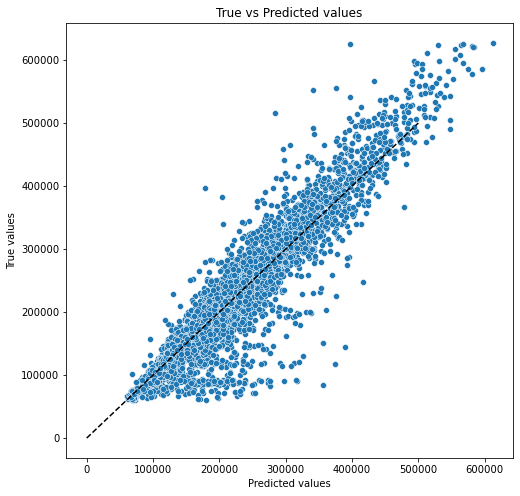

In [346]:
evaluate_preds(y_train, y_train_preds)

R2:	0.746
RMSE:	47175.338
MSE:	2225512485.465


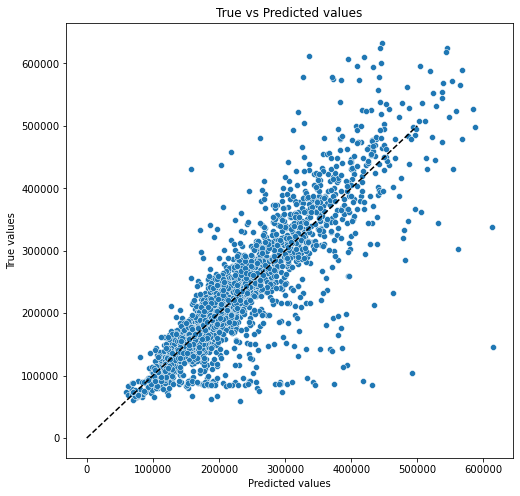

In [347]:
evaluate_preds(y_valid, y_test_preds)

### Прогноз на тестовом датасете

In [349]:
TEST_PREDICT_DATASET_PATH = './project_data_from_kaggle/sample_submission.csv'
predict = pd.read_csv(TEST_PREDICT_DATASET_PATH)
predict.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [355]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,4378,0,1036.0,1,1,0,1,0,1,0,1
1,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,629,1,920.0,0,0,0,1,0,1,1,0
2,2.0,59.463678,32.679351,9.0,19,19.0,1977,0.211401,9,1892,0,920.0,0,1,0,1,0,1,0,1
3,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,475,0,920.0,0,0,0,1,0,1,0,1
4,1.0,53.837056,32.679351,5.0,8,17.0,1977,0.309479,35,7715,4,990.0,0,6,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,6,6.0,1962,0.069660,31,6119,4,920.0,1,2,0,1,0,1,0,1
4996,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,15,2787,2,520.0,0,7,0,1,0,1,0,1
4997,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,28,6533,1,1015.0,2,5,0,1,0,1,0,1
4998,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,33,7976,5,920.0,0,11,0,1,0,1,0,1


In [356]:
scaled_features_test = scaler.transform(test_df[feature_names_for_stand])

In [357]:
scaled_features_test.shape

(5000, 14)

In [358]:
test_df[feature_names_for_stand] = scaled_features_test

In [359]:
test_df.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,-1.0,-0.663725,-0.991486,-0.25,-0.250,-0.625,-0.259259,-0.222622,-0.033333,-0.158483,-0.4,0.7250,0.0,-0.4,0,1,0,1,0,1
1,-1.0,-0.426139,0.721712,1.00,0.000,0.375,1.481481,-0.020328,-0.766667,-0.813559,-0.2,0.0000,-0.5,-0.6,0,1,0,1,1,0
2,0.0,0.287922,0.000000,0.75,1.500,0.625,0.000000,0.761351,-0.533333,-0.592871,-0.4,0.0000,-0.5,-0.4,0,1,0,1,0,1
3,1.0,-0.125189,0.088636,0.00,-0.625,-1.500,-0.444444,-0.346401,-0.766667,-0.840468,-0.4,0.0000,-0.5,-0.6,0,1,0,1,0,1
4,-1.0,0.051163,0.000000,-0.25,0.125,0.375,0.000000,1.311936,0.333333,0.424602,0.4,0.4375,-0.5,0.6,0,1,0,1,0,1


In [360]:
predictions = model.predict(test_df)
predictions

array([159838.02512189, 123698.72979743, 153867.80810777, ...,
       147646.35276234, 195262.8444371 , 292695.70498535])

In [361]:
predict['Price'] = predictions
predict.head()

,Id,Price
0,4567,159838.025122
1,5925,123698.729797
2,960,153867.808108
3,3848,106220.877703
4,746,189441.356652


In [363]:
predict.to_csv('./project_data_from_kaggle/Predictions.csv', index=False)